In [1]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 12.9 MB/s 


In [2]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
#a handful of sites
sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen','Dublin','Hamburg','Istanbul','Kiev','London','Madrid','Milan','Moscow','Munich','Paris','Prague','Rome','Saint Petersburg','Sofia','Stockholm','Vienna','Warsaw']
# sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen']
latlng = ['latitude', 'longitude']
position = pd.read_csv('position.csv', index_col="City")
flighttime = pd.read_csv('flight_time.csv', index_col="City")
distance = pd.read_csv('distance.csv', index_col="City")
position.head(5)
# print(len(sites))

In [6]:
#make some positions (so we can plot this)
positions = dict( ( city, (position.loc[city, 'longitude'], position.loc[city, 'latitude']) ) for city in sites)

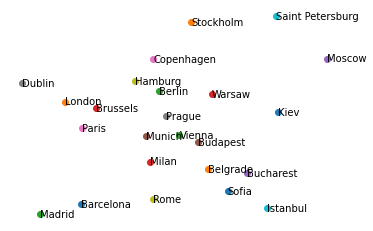

In [72]:
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');

In [97]:
# get distanc between cities

distances = dict( ((s1,s2), distance.loc[s1, s2]) for s1 in positions for s2 in positions if s1!=s2)

In [98]:
print(distances)

{('Barcelona', 'Belgrade'): 1528.13, ('Barcelona', 'Berlin'): 1497.61, ('Barcelona', 'Brussels'): 1062.89, ('Barcelona', 'Bucharest'): 1968.42, ('Barcelona', 'Budapest'): 1498.79, ('Barcelona', 'Copenhagen'): 1757.54, ('Barcelona', 'Dublin'): 1469.29, ('Barcelona', 'Hamburg'): 1471.78, ('Barcelona', 'Istanbul'): 2230.42, ('Barcelona', 'Kiev'): 2391.06, ('Barcelona', 'London'): 1137.67, ('Barcelona', 'Madrid'): 504.64, ('Barcelona', 'Milan'): 725.12, ('Barcelona', 'Moscow'): 3006.93, ('Barcelona', 'Munich'): 1054.55, ('Barcelona', 'Paris'): 831.59, ('Barcelona', 'Prague'): 1353.9, ('Barcelona', 'Rome'): 856.69, ('Barcelona', 'Saint Petersburg'): 2813.02, ('Barcelona', 'Sofia'): 1745.55, ('Barcelona', 'Stockholm'): 2276.51, ('Barcelona', 'Vienna'): 1347.43, ('Barcelona', 'Warsaw'): 1862.33, ('Belgrade', 'Barcelona'): 1528.13, ('Belgrade', 'Berlin'): 999.25, ('Belgrade', 'Brussels'): 1372.59, ('Belgrade', 'Bucharest'): 447.34, ('Belgrade', 'Budapest'): 316.41, ('Belgrade', 'Copenhagen'): 

In [99]:
K = 1 #the number of vehicles 

In [101]:
#create the problem
prob=LpProblem("vehicle", LpMinimize)

In [102]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x',distances, 0,1,LpBinary)
#dummy vars to eliminate subtours
u = LpVariable.dicts('u', sites, 0, len(sites)-1, LpInteger)

In [103]:
#the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [104]:
#constraints
for k in sites:
    cap = 1 if k != 'Berlin' else K
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if (i,k) in x]) ==cap
    #outbound connection
    prob+=lpSum([ x[(k,i)] for i in sites if (k,i) in x]) ==cap
    
#subtour elimination
N=len(sites)/K
for i in sites:
    for j in sites:
        if i != j and (i != 'Berlin' and j!= 'Berlin') and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

In [105]:
non_zero_edges = [ e for e in x if value(x[e]) != 0 ]

def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0]==parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges

# get_next_site('Berlin')

In [106]:
tours = [('Berlin', 'Barcelona'),
 ('Berlin', 'Belgrade'),
 ('Berlin', 'Brussels'),
 ('Berlin', 'Bucharest'),
 ('Berlin', 'Budapest'),
 ('Berlin', 'Copenhagen'),
 ('Berlin', 'Dublin'),
 ('Berlin', 'Hamburg'),
 ('Berlin', 'Istanbul'),
 ('Berlin', 'Kiev'),
 ('Berlin', 'London'),
 ('Berlin', 'Madrid'),
 ('Berlin', 'Milan'),
 ('Berlin', 'Moscow'),
 ('Berlin', 'Munich'),
 ('Berlin', 'Paris'),
 ('Berlin', 'Prague'),
 ('Berlin', 'Rome'),
 ('Berlin', 'Saint Petersburg'),
 ('Berlin', 'Sofia'),
 ('Berlin', 'Stockholm'),
 ('Berlin', 'Vienna'),
 ('Berlin', 'Warsaw')]
print(tours)
tours = [ [e] for e in tours ]

for t in tours:
    while t[0][0] !='Berlin':
        t.append(get_next_site(t[0][1])[0])

[('Berlin', 'Barcelona'), ('Berlin', 'Belgrade'), ('Berlin', 'Brussels'), ('Berlin', 'Bucharest'), ('Berlin', 'Budapest'), ('Berlin', 'Copenhagen'), ('Berlin', 'Dublin'), ('Berlin', 'Hamburg'), ('Berlin', 'Istanbul'), ('Berlin', 'Kiev'), ('Berlin', 'London'), ('Berlin', 'Madrid'), ('Berlin', 'Milan'), ('Berlin', 'Moscow'), ('Berlin', 'Munich'), ('Berlin', 'Paris'), ('Berlin', 'Prague'), ('Berlin', 'Rome'), ('Berlin', 'Saint Petersburg'), ('Berlin', 'Sofia'), ('Berlin', 'Stockholm'), ('Berlin', 'Vienna'), ('Berlin', 'Warsaw')]


In [66]:
print(tours)

[[('Berlin', 'Barcelona')], [('Berlin', 'Belgrade')], [('Berlin', 'Brussels')], [('Berlin', 'Bucharest')], [('Berlin', 'Budapest')], [('Berlin', 'Copenhagen')], [('Berlin', 'Dublin')], [('Berlin', 'Hamburg')], [('Berlin', 'Istanbul')], [('Berlin', 'Kiev')], [('Berlin', 'London')], [('Berlin', 'Madrid')], [('Berlin', 'Milan')], [('Berlin', 'Moscow')], [('Berlin', 'Munich')], [('Berlin', 'Paris')], [('Berlin', 'Prague')], [('Berlin', 'Rome')], [('Berlin', 'Saint Petersburg')], [('Berlin', 'Sofia')], [('Berlin', 'Stockholm')], [('Berlin', 'Vienna')], [('Berlin', 'Warsaw')]]


In [107]:
for t in tours:
    print(' -> '.join([ b for a,b in t]+['Berlin']))

Barcelona -> Berlin
Belgrade -> Berlin
Brussels -> Berlin
Bucharest -> Berlin
Budapest -> Berlin
Copenhagen -> Berlin
Dublin -> Berlin
Hamburg -> Berlin
Istanbul -> Berlin
Kiev -> Berlin
London -> Berlin
Madrid -> Berlin
Milan -> Berlin
Moscow -> Berlin
Munich -> Berlin
Paris -> Berlin
Prague -> Berlin
Rome -> Berlin
Saint Petersburg -> Berlin
Sofia -> Berlin
Stockholm -> Berlin
Vienna -> Berlin
Warsaw -> Berlin


In [108]:
totalTime = 0;
import random
climate_issues = input("climate issues? ")
climate_factor = 0
if climate_issues == "y":
  severity = int(input("Severity? 5-20 "))
  climate_issues = random.randint(5,severity)
for t in tours:
    time = 0
    for i in range(0, len(t)):
        time += flighttime.loc[t[i][0], t[i][1]] + climate_issues
#         print(flighttime.loc[t[i][0], t[i][1]])
#     print(time)
    if time > totalTime:
        totalTime = time
print(totalTime)

climate issues? y
Severity? 5-20 10
415


In [71]:
flighttime

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,Saint Petersburg,Sofia,Stockholm,Vienna,Warsaw
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,0,379,373,336,416,383,397,372,369,444,...,533,355,315,362,318,502,395,444,370,405
Belgrade,379,0,326,361,274,270,355,433,345,312,...,413,325,372,305,302,407,263,382,286,308
Berlin,373,326,0,291,349,305,261,352,145,395,...,398,190,317,258,345,359,351,303,290,277
Brussels,336,361,291,0,394,347,301,305,273,436,...,459,308,264,299,346,414,388,348,327,337
Bucharest,416,274,349,394,0,295,373,465,369,273,...,388,358,407,332,337,396,254,388,316,313
Budapest,383,270,305,347,295,0,333,418,324,339,...,404,312,361,285,318,390,294,360,268,287
Copenhagen,397,355,261,301,373,333,0,345,252,419,...,392,325,331,289,375,342,379,276,320,289
Dublin,372,433,352,305,465,418,345,0,327,508,...,508,380,310,368,411,452,459,379,399,399
Hamburg,369,345,145,273,369,324,252,327,0,415,...,410,198,303,275,354,364,370,299,308,295


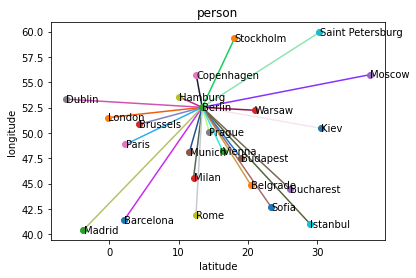

In [109]:
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.title('%d '%K + 'people' if K > 1 else 'person')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()

In [110]:
print('Longest time spent:', totalTime, '(min)')
print('Total distance:', value(prob.objective), '(km)')

Longest time spent: 415 (min)
Total distance: None (km)


In [89]:
prob.objective

LpAffineExpression([(x_('Barcelona',_'Belgrade'), 1528.13),
                    (x_('Barcelona',_'Berlin'), 1497.61),
                    (x_('Barcelona',_'Brussels'), 1062.89),
                    (x_('Barcelona',_'Bucharest'), 1968.42),
                    (x_('Barcelona',_'Budapest'), 1498.79),
                    (x_('Barcelona',_'Copenhagen'), 1757.54),
                    (x_('Barcelona',_'Dublin'), 1469.29),
                    (x_('Barcelona',_'Hamburg'), 1471.78),
                    (x_('Barcelona',_'Istanbul'), 2230.42),
                    (x_('Barcelona',_'Kiev'), 2391.06),
                    (x_('Barcelona',_'London'), 1137.67),
                    (x_('Barcelona',_'Madrid'), 504.64),
                    (x_('Barcelona',_'Milan'), 725.12),
                    (x_('Barcelona',_'Moscow'), 3006.93),
                    (x_('Barcelona',_'Munich'), 1054.55),
                    (x_('Barcelona',_'Paris'), 831.59),
                    (x_('Barcelona',_'Prague'), 1353.9),
      